In [1]:
import Metrica_IO as mio
import Metrica_Vizuals as miz
import Metrica_Velocities as mvel
import numpy as np
import pandas as pd
import Metrica_Pitch_Control as mpc
import matplotlib.pyplot as plt
import Metrica_EPV as mepv
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
DATA_DIR=r'C:\Users\User\Desktop\FootballAnalysis\sample-data-master'
game_id=2
team_1="Home"
team_2="Away"

#Reading Event & Tracking Data
# StartFrame in event data is sychnronized-aligned with index in tracking data
event=mio.read_event_data(DATA_DIR,game_id)

event=mio.transform_coord_system(event)

tracking_home=mio.read_tracking_data(DATA_DIR,game_id,team_1)
tracking_away=mio.read_tracking_data(DATA_DIR,game_id,team_2)

tracking_away=mio.transform_coord_system(tracking_away)
tracking_home=mio.transform_coord_system(tracking_home)

Reading team: home
Reading team: away


In [3]:
#Reverse directions such that the home team is always attacking from left to right
# DEFAULT COLORS: Home Team: Black, Away Team: Red 
event,tracking_home,tracking_away=mio.set_single_playing_direction(event,tracking_home,tracking_away)

#Calculating Velocities for Home and Away Team
tracking_away=mvel.calc_player_velocities(tracking_away)
tracking_home=mvel.calc_player_velocities(tracking_home)

Calculating velocities for:  Away
Calculating velocities for:  Home


In [4]:
#Load default model parameters
params=mpc.get_model_parameters()
# Load Goalkeepers names
GK_NAMES=(mio.get_goalkeeper_name(tracking_home),mio.get_goalkeeper_name(tracking_away))

print("Goalkeeper names:\nHome: %s\nAway: %s" %(GK_NAMES[0] ,GK_NAMES[1]))

Goalkeeper names:
Home: Home_11
Away: Away_25


### EPV grid for Home and Away Team

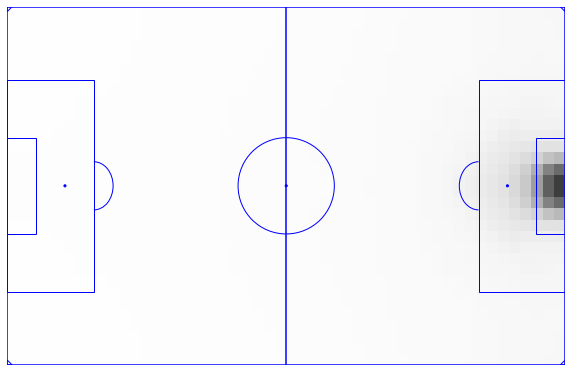

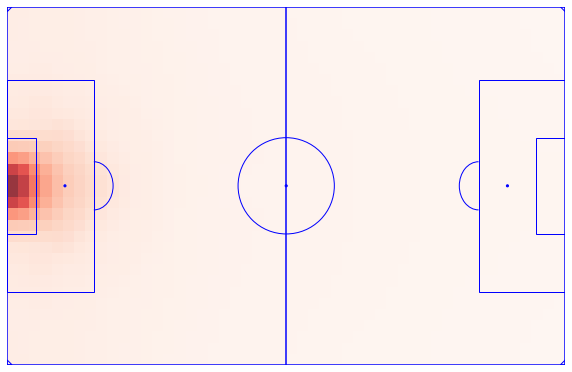

In [9]:
# Load predefined EPV GRID from @HarvardSoccer
home_attack_direction=mio.find_attacking_direction("Home")# Always left to right
away_attack_direction=mio.find_attacking_direction("Away")# Always right to left
epv_grid=mepv.load_EPV_grid()

#uncomment for interaction , move cursor to see EPV
#%matplotlib notebook 

# Plot EPV for home_team
miz.plot_EPV_grid(epv_grid,home_attack_direction) 
# Plot EPV for away_team
miz.plot_EPV_grid(epv_grid,away_attack_direction) 

# Darker areas show higher EPV

### Expected EPV for pass at 822

Player 23 makes the best choice and passes to a location that gives the highest Expected EPV which means that the target possession has higher probability to lead in a Goal. Darker red areas indicate higher EPV for Away team. This pass is actually an assist for Away Team's first goal.

Text(0.5, 1.0, 'Pass EPV added: 0.0775')

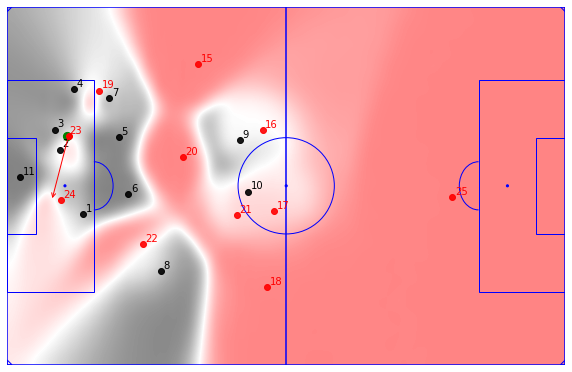

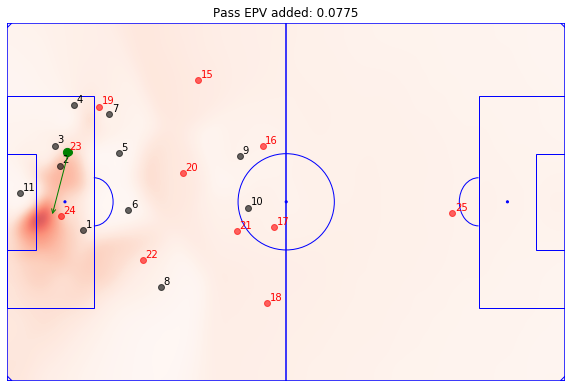

In [15]:
pc_att,x_grid,y_grid=mpc.find_pitch_control_for_event(822,event,tracking_home,tracking_away,params,GK_NAMES,num_grid_cells_x=50)
miz.plot_pitch_control_for_event(822,event,tracking_home,tracking_away,pc_att,x_grid,y_grid,annotate_player=True)
fig,ax=miz.plot_EPV_grid_for_event(822,event,tracking_home,tracking_away,epv_grid,pc_att,annotate_player=True)
epv_added_from_pass=mepv.calculate_EPV_added(822,event,tracking_home,tracking_away,GK_NAMES,params,epv_grid)
ax.set_title('Pass EPV added: {:.3}'.format(epv_added_from_pass))

Player 18 doesn't make the highest EPV pass. He could have passed to player 23 or 26 who are near the goalkeeper and goal.
Although the pass is made at an area controlled by the Away Team and is successfull.

Text(0.5, 1.0, 'Pass EPV added: 0.0731')

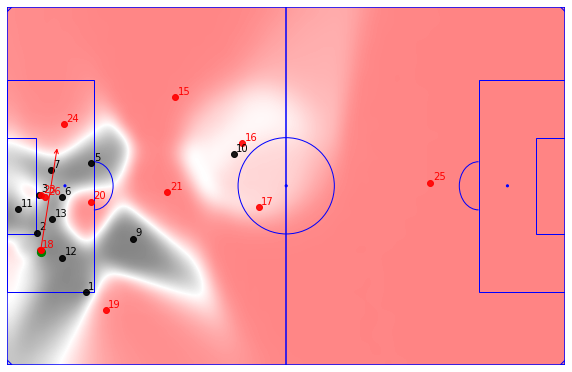

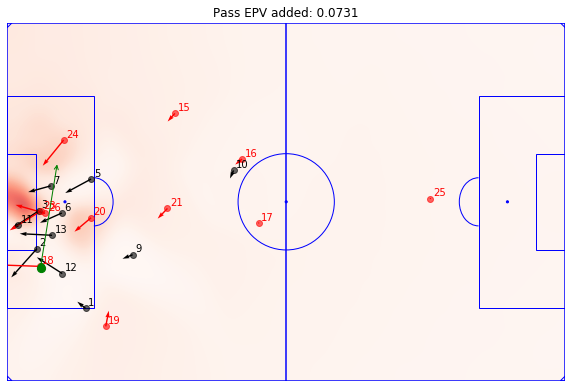

In [16]:
pc_att,x_grid,y_grid=mpc.find_pitch_control_for_event(1663,event,tracking_home,tracking_away,params,GK_NAMES,num_grid_cells_x=50)
miz.plot_pitch_control_for_event(1663,event,tracking_home,tracking_away,pc_att,x_grid,y_grid,annotate_player=True)
fig,ax=miz.plot_EPV_grid_for_event(1663,event,tracking_home,tracking_away,epv_grid,pc_att,annotate_player=True,include_player_velocities=True)
epv_added_from_pass=mepv.calculate_EPV_added(1663,event,tracking_home,tracking_away,GK_NAMES,params,epv_grid)
ax.set_title('Pass EPV added: {:.3}'.format(epv_added_from_pass))

Now, we see positive EPV added even though the direction of the ball isn't towards the opporents' team goal. Player 9 has 3 opponents around him and manages to pass to player 8 who seems unmarked.

Text(0.5, 1.0, 'Pass EPV added: 0.0229')

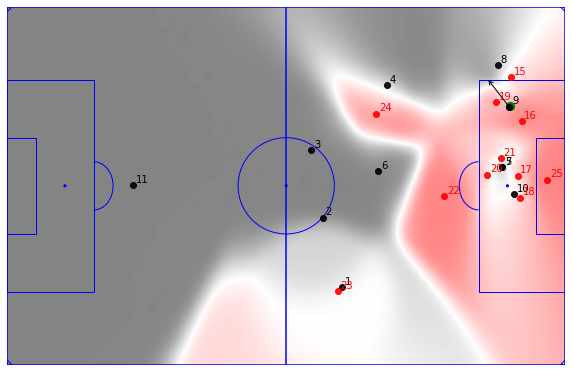

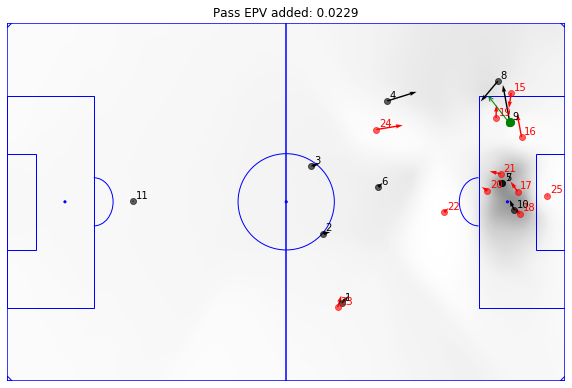

In [17]:
pc_att,x_grid,y_grid=mpc.find_pitch_control_for_event(195,event,tracking_home,tracking_away,params,GK_NAMES,num_grid_cells_x=50)
miz.plot_pitch_control_for_event(195,event,tracking_home,tracking_away,pc_att,x_grid,y_grid,annotate_player=True)
fig,ax=miz.plot_EPV_grid_for_event(195,event,tracking_home,tracking_away,epv_grid,pc_att,annotate_player=True,include_player_velocities=True)
epv_added_from_pass=mepv.calculate_EPV_added(195,event,tracking_home,tracking_away,GK_NAMES,params,epv_grid)
ax.set_title('Pass EPV added: {:.3}'.format(epv_added_from_pass))

Option to put contours to areas within 75% of max expected EPV. contour=True

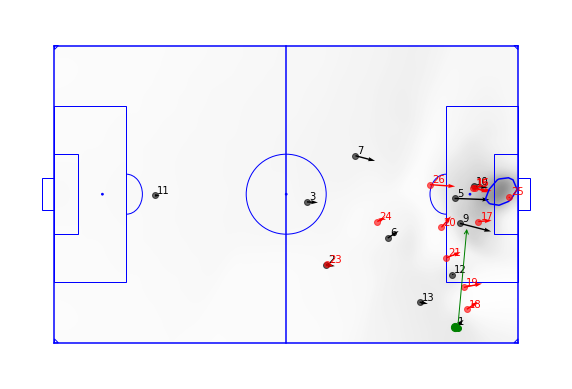

In [18]:
#assist pass
pc_att,x_grid,y_grid=mpc.find_pitch_control_for_event(1680,event,tracking_home,tracking_away,params,GK_NAMES,num_grid_cells_x=50)
fig,ax=miz.plot_EPV_grid_for_event(1680,event,tracking_home,tracking_away,epv_grid,pc_att,annotate_player=True,include_player_velocities=True, contour=True)

Low value pass from the goalkeeper of the home team. He could have passed to any of the contour areas illustrated above.

Text(0.5, 1.0, 'Pass EPV added: -0.003')

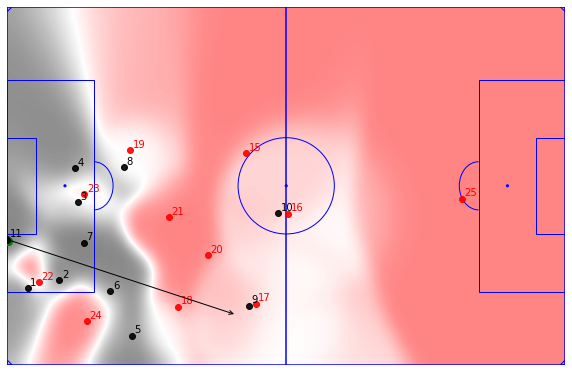

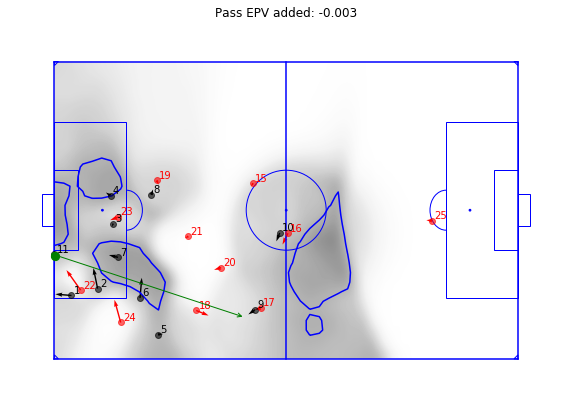

In [19]:
# Low value pass, definitely not the best option
pc_att,x_grid,y_grid=mpc.find_pitch_control_for_event(29,event,tracking_home,tracking_away,params,GK_NAMES,num_grid_cells_x=50)
miz.plot_pitch_control_for_event(29,event,tracking_home,tracking_away,pc_att,x_grid,y_grid,annotate_player=True)
fig,ax=miz.plot_EPV_grid_for_event(29,event,tracking_home,tracking_away,epv_grid,pc_att,annotate_player=True,include_player_velocities=True,contour=True)
epv_added_from_pass=mepv.calculate_EPV_added(29,event,tracking_home,tracking_away,GK_NAMES,params,epv_grid)
ax.set_title('Pass EPV added: %1.3f' % epv_added_from_pass)


### Top 5 Away and Home passes with the highest EPV added

In [24]:
# Away passes
away_passes=event[(event["Type"]=="PASS") & (event["Team"]=="Away")].index
# Home passes
home_passes=event[(event["Type"]=="PASS") & (event["Team"]=="Home")].index

# EPV added for away passes
epv_added_away=[]
for i in away_passes:
    epv_added_away.append( (i,mepv.calculate_EPV_added(i,event,tracking_home,tracking_away,GK_NAMES,params,epv_grid)) )

# EPV added for home passes
epv_added_home=[]
for i in home_passes:
    epv_added_home.append( (i,mepv.calculate_EPV_added(i,event,tracking_home,tracking_away,GK_NAMES,params,epv_grid)))

epv_added_away=sorted(epv_added_away,key= lambda x: x[1],reverse=True)
epv_added_home=sorted(epv_added_home,key= lambda x: x[1],reverse=True)

print("(Event id , EPV added)")
for i in range(5):
    print("Home-",i+1,": ",epv_added_home[i])
    print("Away-",i+1,": ",epv_added_away[i])


(Event id , EPV added)
Home- 1 :  (1753, 0.09265749143617401)
Away- 1 :  (822, 0.07749918188362635)
Home- 2 :  (197, 0.06373314311786434)
Away- 2 :  (1663, 0.07307140355610156)
Home- 3 :  (1478, 0.058521160586859)
Away- 3 :  (961, 0.0693199592166991)
Home- 4 :  (430, 0.048485575603859396)
Away- 4 :  (1901, 0.06259441714951341)
Home- 5 :  (851, 0.03393306378582653)
Away- 5 :  (959, 0.032505987012626004)
